# PPG Field Study Dataset
## 0/ Imports des modules

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

## 1/ Chargement des données

In [2]:
path = "./data/S1/S1.pkl"

In [3]:
with open(path, "rb") as f:
    data = pickle.load(f, encoding="latin-1")

## 2/ Analyse des données

In [4]:
data.keys()

dict_keys(['rpeaks', 'signal', 'label', 'activity', 'questionnaire', 'subject'])

In [5]:
pd.DataFrame(data["signal"])

chest  \
ACC   [[0.8564000129699707, -0.06779998540878296, -0...   
ECG   [[0.015609741210937498], [0.01812744140625], [...   
EMG   [[-1.5], [-1.5], [-1.5], [-1.5], [-1.5], [-1.5...   
EDA   [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....   
Temp  [[-273.15], [-273.15], [-273.15], [-273.15], [...   
Resp  [[4.44183349609375], [4.45098876953125], [4.47...   
BVP                                                 NaN   
TEMP                                                NaN   

                                                  wrist  
ACC   [[-0.765625, -0.078125, 0.671875], [-0.765625,...  
ECG                                                 NaN  
EMG                                                 NaN  
EDA   [[4.722437], [4.728843], [4.718594], [4.717312...  
Temp                                                NaN  
Resp                                                NaN  
BVP   [[7.28], [6.33], [5.46], [4.6], [3.74], [2.86]...  
TEMP  [[32.13], [32.16], [32.16], [32.16], [32.16], ...

## 3/ Création de DataFrame

In [6]:
dfs  = []
pbms = []
oks  = []
for key in data.keys():
    try:
        df = pd.DataFrame(data[key])
        #df = df.dropna()
        dfs.append(df)
        oks.append(key)
    except Exception as e:
        pbms.append(key + str(e))
print(f"clefs ok = {oks}")
print(f"clefs avec un pbms = {pbms}")

clefs ok = ['rpeaks', 'signal', 'label', 'activity']
clefs avec un pbms = ['questionnaireIf using all scalar values, you must pass an index', 'subjectDataFrame constructor not properly called!']


### 3.1/ Regarder les DataFrames

In [7]:
for df in dfs:
    print(df)

0
0          240
1         1174
2         2128
3         3099
4         3907
...        ...
11426  6446343
11427  6446825
11428  6447292
11429  6447748
11430  6448224

[11431 rows x 1 columns]
                                                  chest  \
ACC   [[0.8564000129699707, -0.06779998540878296, -0...   
ECG   [[0.015609741210937498], [0.01812744140625], [...   
EMG   [[-1.5], [-1.5], [-1.5], [-1.5], [-1.5], [-1.5...   
EDA   [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....   
Temp  [[-273.15], [-273.15], [-273.15], [-273.15], [...   
Resp  [[4.44183349609375], [4.45098876953125], [4.47...   
BVP                                                 NaN   
TEMP                                                NaN   

                                                  wrist  
ACC   [[-0.765625, -0.078125, 0.671875], [-0.765625,...  
ECG                                                 NaN  
EMG                                                 NaN  
EDA   [[4.722437], [4.728843], [4.718594], 

### 3.2/ Dissocier les capteurs de torse et de poignet et visualisation de la shape des dataframes

In [8]:
dfchest = dfs[1]['chest'].dropna()
print("Shape of Chest")
for dfc in dfchest:
    print(dfc.shape)
dfwrist = dfs[1]['wrist'].dropna()
print("\nShape of Wrist")
for dfw in dfwrist:
    print(dfw.shape)

Shape of Chest
(6448400, 3)
(6448400, 1)
(6448400, 1)
(6448400, 1)
(6448400, 1)
(6448400, 1)

Shape of Wrist
(294784, 3)
(36848, 1)
(589568, 1)
(36848, 1)


### 3.3/ Création de données propres

In [9]:
cleanedData = []
rpeaks = dfs[0]
indexes = {
    '0': 'accChest',
    '1': 'ecg',
    '2': 'resp',
    '3': 'accWrist',
    '4': 'bvp',
    '5': 'eda',
    '6': 'temp'
}
accChest = []
for accElement in dfchest['ACC']:
    accChest.append(accElement)
cleanedData.append(accChest)

ecg = []
for ecgElement in dfchest['ECG']:
    ecg.append(ecgElement)
cleanedData.append(ecg)

resp = []
for respElement in dfchest['Resp']:
    resp.append(respElement)
cleanedData.append(resp)

accWrist = []
for accElement in dfwrist['ACC']:
    accWrist.append(accElement)
cleanedData.append(accWrist)

bvp = []
for bvpElement in dfwrist['BVP']:
    bvp.append(bvpElement)
cleanedData.append(bvp)

eda = []
for edaElement in dfwrist['EDA']:
    eda.append(edaElement)
cleanedData.append(eda)

temp = []
for tempElement in dfwrist['TEMP']:
    temp.append(tempElement)
cleanedData.append(temp)


In [10]:
pd.DataFrame(cleanedData[1]).sample(10)

0
4089680 -0.136276
799733  -0.028336
462270   0.015060
5809143 -0.145340
4234278 -0.267014
1657059 -0.033966
5089256 -0.438904
5901130  0.396103
1826945 -0.321304
3771314 -0.241196

## 4/ Data Visualisation

### 4.1/ Calibrage des données sur 4hz pour création d'une matrice contenant les données et d'un tableau de dataframes + Data Visualisation sur des plots

* Calibrage
* Mise à bout a bout de tous les sujets
* Data Visualisation

window size:  175.0
window size:  175.0
window size:  175.0
window size:  8.0
window size:  16.0
window size:  1.0
window size:  1.0


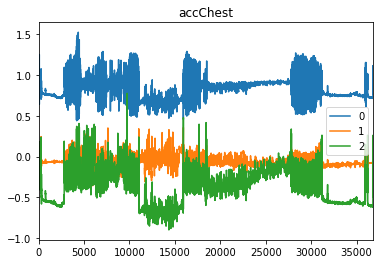

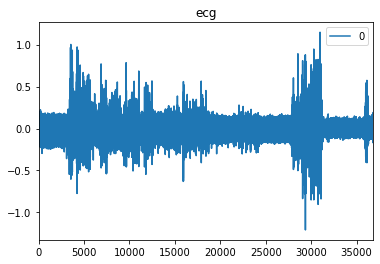

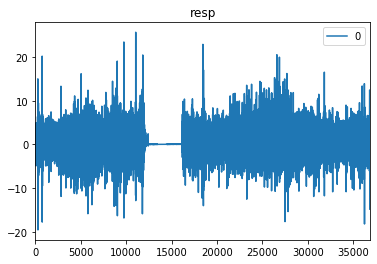

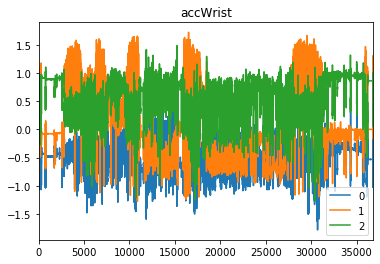

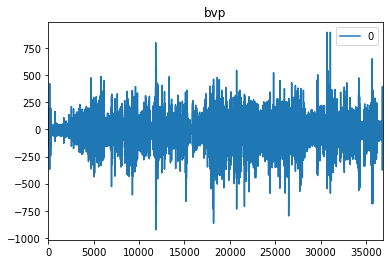

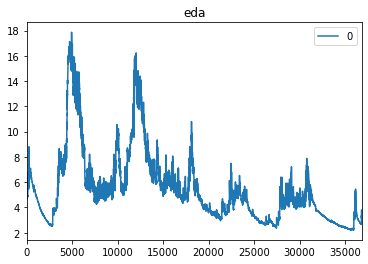

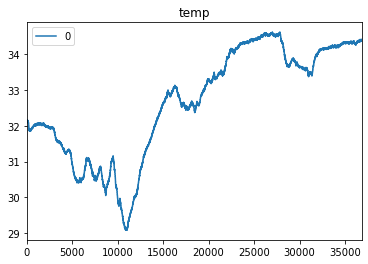

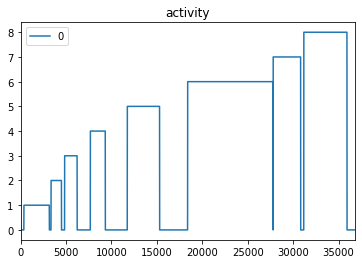

In [11]:
# def sampler(dfs, dfwrist, cleanedData):
sampledDataFrames = []
sampledMatrix = []
index = 0
for data in cleanedData:
    sampledData = []
    windowSize = len(data)/dfwrist['EDA'].shape[0]
    print("window size:  " + str(windowSize))
    counter = 0
    sum = 0
    for element in data:
        sum = sum + element
        counter += 1
        if counter >= windowSize:
            mean = sum / windowSize
            sampledData.append(mean)
            counter = 0
            sum = 0
    
    sampledMatrix.append(sampledData)
    sampledDf = pd.DataFrame(sampledData)
    sampledDataFrames.append(sampledDf)
    sampledDf.plot(title = str(indexes[str(index)]))
    index += 1

activityDf = pd.DataFrame(dfs[3])
activityDf.plot(title = 'activity')

# sampler(dfs, dfwrist, cleanedData)

In [12]:
sampledMatrix[1][0]

array([0.03565011])

### 4.2/ Création d'une dataframe propre

In [13]:
Xdata = []

for i in range(0, activityDf.shape[0]):
    Xdata.append(
        {
            'accChestX': sampledMatrix[0][i][0],
            'accChestY': sampledMatrix[0][i][1],
            'accChestZ': sampledMatrix[0][i][2],
            'ecg': sampledMatrix[1][i],
            'resp': sampledMatrix[2][i],
            'accWristX': sampledMatrix[3][i][0],
            'accWristY': sampledMatrix[3][i][1],
            'accWristZ': sampledMatrix[3][i][2],
            'bvp': sampledMatrix[4][i],
            'eda': sampledMatrix[5][i],
            'temp': sampledMatrix[6][i]
        }
    )
Xdf = pd.DataFrame(Xdata)
Xdf

accChestX  accChestY  accChestZ                      ecg  \
0       0.852157  -0.066488  -0.367784   [0.035650111607142855]   
1       0.851262  -0.066655  -0.370442     [0.1031451416015625]   
2       0.851570  -0.064677  -0.370251    [0.09910112653459821]   
3       0.852142  -0.065486  -0.371278   [-0.17075657435825892]   
4       0.851958  -0.065894  -0.370466  [-0.036633387974330356]   
...          ...        ...        ...                      ...   
36843   0.891063  -0.103047  -0.259369   [-0.09917855398995536]   
36844   0.883310  -0.095680  -0.275970    [0.03201102120535714]   
36845   0.883173  -0.095453  -0.283041    [0.03252293178013393]   
36846   0.883605  -0.100127  -0.281023   [0.004954049246651786]   
36847   0.883639  -0.100390  -0.277805   [0.020010550362723215]   

                        resp  accWristX  accWristY  accWristZ  \
0        [4.834437779017857]  -0.763672  -0.076172   0.669922   
1        [4.238839285714286]  -0.763672  -0.078125   0.671875   
2        [2.058558872767857]  -0.761719  -0.078125   0.671875   
3      [-0.4639805385044643]  -0.753906  -0.078125   0.671875   
4      [-1.8673967633928572]  -0.761719  -0.076172   0.671875   
...                      ...        ...        ...        ...   
36843  [-1.9022478376116072]  -0.384766  -0.023438   0.931641   
36844  [-2.1953212193080356]  -0.375000  -0.015625   0.939453   
36845   [-2.961940220424107]  -0.390625  -0.009766   0.929688   
36846   [-3.290858677455357]  -0.382812  -0.007812   0.933594   
36847   [-3.257969447544643]  -0.382812  -0.001953   0.937500   

                         bvp         eda     temp  
0      [0.13812500000000016]  [4.722437]  [32.13]  
1                 [-26.2625]  [4.728843]  [32.16]  
2      [-40.959374999999994]  [4.718594]  [32.16]  
3                [24.173125]  [4.717312]  [32.16]  
4                 [25.78125]  [4.713469]  [32.16]  
...                      ...         ...      ...  
36843            [69.639375]  [3.199053]  [34.37]  
36844             [-37.3375]  [3.186241]  [34.37]  
36845    [7.081874999999999]  [3.170867]  [34.37]  
36846              [-35.065]  [3.159336]  [34.37]  
36847   [10.376875000000002]  [3.151649]  [34.37]  

[36848 rows x 11 columns]

## 5/ Modélisation

5.1/ Import des modules

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### 5.2/ Split des données en train et test

In [15]:
print('Shape of data : {0}\nShape of activities : {1}'.format(Xdf.shape, activityDf.shape))

Shape of data : (36848, 11)
Shape of activities : (36848, 1)


## 5.3/ Première modélisation

In [16]:
performances = dict()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(Xdf, activityDf, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27636, 11), (9212, 11), (27636, 1), (9212, 1))

In [18]:
algorithme = LinearRegression()
algorithme.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
algorithme.score(X_test, y_test)

0.4481095440347319

In [20]:
performances[algorithme] = algorithme.score(X_test, y_test)

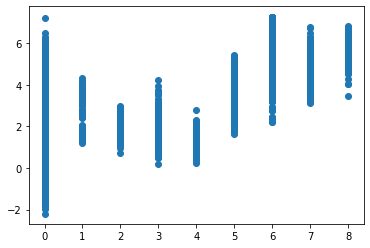

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x=y_test, y=algorithme.predict(X_test))

### 5.4/ Transformation en fonction

In [22]:
def get_score(algorithme, X_train, X_test, y_train, y_test):
    X_train, X_test, y_train, y_test = train_test_split(Xdf, activityDf, random_state=42)
    print("X_train: {}, X_test: {}, y_train: {}, y_test: {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))
    modele = algorithme.fit(X_train, y_train)
    score = modele.score(X_test, y_test)
    return score

In [23]:
get_score(algorithme, *train_test_split(Xdf, activityDf, random_state=1234))

X_train: (27636, 11), X_test: (9212, 11), y_train: (27636, 1), y_test: (9212, 1)


0.4481095440347319

### 5.5/ Standardisation des valeurs

In [24]:
from sklearn.preprocessing import StandardScaler
scaler   = StandardScaler().fit(X_train)
X_train  = scaler.transform(X_train)
X_test   = scaler.transform(X_test)

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [26]:
X = Xdf
y = activityDf

### 5.6/ Cross Validation

In [27]:
results = cross_val_score(LinearRegression(), X, y, cv=4)
display(results, results.mean(), results.std())

array([-1.93145653, -0.5328887 ,  0.        , -2.04364325])

-1.1269971211153205

0.8818279859275067

In [28]:
def multiple_cross_val_scores(algorithme, X, y):
    import numpy as np
    results=dict()
    for kfold in range(3,100, 20):
        score = cross_val_score(algorithme, X, y,  cv = 4, scoring='r2')
        results[kfold] = score.mean(), score.std()
    return results

### 5.7/ Decision Tree Regressor

In [29]:
from sklearn.tree import DecisionTreeRegressor
test = multiple_cross_val_scores(DecisionTreeRegressor(),X, y)
test = pd.DataFrame(test, index=["mean", "std"]).T
test

mean       std
3  -1.011672  0.814026
23 -0.827007  0.677925
43 -0.843030  0.692870
63 -1.001042  0.800362
83 -0.993886  0.793340

In [30]:
new_index = [str(x) + " folds" for x in test.index]
test.index = new_index

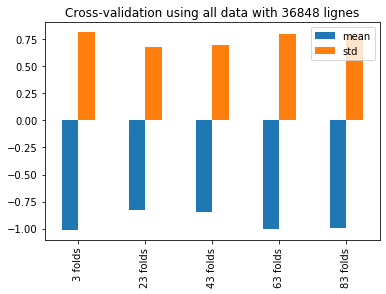

In [31]:
test.plot(kind='bar', title='Cross-validation using all data with {} lignes'.format(X.shape[0]))

### 5.8/ Random Forest Regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor
hyperparametres = { 'n_estimators':30 }
algorithme = RandomForestRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, y_train, y_test)
performances[algorithme] = score
performances

X_train: (27636, 11), X_test: (9212, 11), y_train: (27636, 1), y_test: (9212, 1)
D:\vande\vande\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


{LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False): 0.4481095440347319,
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=30, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False): 0.9708505184127206}

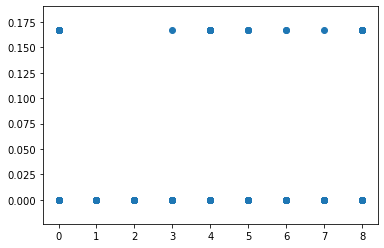

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x=y_test, y=algorithme.predict(X_test))